Dataset:
- https://www.kaggle.com/datasets/ikjotsingh221/obesity-risk-prediction-cleaned/data
- https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition 

Introductory Paper on Dataset:
- https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

# **1. Preparation and Overview (3 points total)**

- **[2 points]** Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the classification task is and what parties would be interested in the results. For example, would the model be deployed or used mostly for offline analysis? As in previous labs, also detail how good the classifier needs to perform in order to be useful.

## **1.1 Business Understanding & Classification Task**

### Business Understanding
- **Obesity** is a growing global health issue, leading to numerous diseases like diabetes, cardiovascular problems, and even certain cancers. According to the World Health Organization (WHO), in 2022, over 1.9 billion adults were overweight, and 650 million of those were classified as obese (source: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight). This rise in obesity has placed significant strain on healthcare systems, making early identification and management of obesity critical to addressing this epidemic. 

- The **Estimation of Obesity Levels Based on Eating Habits and Physical Condition** dataset contains information on individual's lifestyle habits (such as eating behavior, physical activity, and family health history) along with their corresponding obesity levels. The obesity levels are classified into multiple categories: underweight, normal weight, overweight, obese type I, obese type II, and obese type III. The classification task will involve using these lifestyle attributes to predict an individual's obesity level. 

- The objective is to develop a machine learning model that accurately predicts the obesity level of an individual based on their lifestyle habits, with the goal of aiding public health efforts in early obesity detection and personalized health interventions. 

### Business Use-Case
- **Public Health**: One of the critical goals of public health organizations is to prevent chronic diseases associated with obesity, such as Type 2 diabetes and heart disease. By predicting obesity levels early, individuals can be targeted with personalized interventions, reducing the risk of severe health complications later on.
- **Healthcare Providers**: Hospitals and clinics can use this classification model to create preventive healthcare plans tailored to individuals. For example, individuals classified as overweight or at risk of obesity could be enrolled in nutrition or physical activity programs to mitiage the progression to higher obesity levels.
- **Fitness and Wellness Industry**: Personalized fitness and wellness programs rely heavily on understanding an individual's current health condition. This model can assist personal trainers, dieticians, and fitness apps in recommending targeted lifestyle changes, exercises, or dietary regimens based on the user's predicted obesity level.

### Interested Parties
- **Public Health Organizations**: Government bodies and organizations like WHO and the American Obesity Foundation (AOF) can benefit from the insights provided by this model, using it to design mass intervention programs or tailor their awareness campaigns based on obesity risk.
- **Healthcare Providers and Insurers**: Hospitals and insurance companies might be interested in using these predictions to prioritize care for high-risk individuals and create preventive strategies that reduce long-term healthcare costs.
- **Fitness and Wellness Companies**: Companies offering fitness coaching, wellness programs, and nutrition planning can use this predictive tool to personalize health plans and improve client outcomes.
- **Pharmaceutical Companies**: Lastly, understanding obesity levels in populations can also be valuable for pharmaceutical companies that develop weight management drugs, as it helps in identifying the target populations for such treatments.

### Classification Task
- This task is a **multi-class classification** problem where the `target` variable is the obesity level of individuals. The labels include the obesity categories of: 
    - underweight, normal weight, overweight, obesity type I, obesity type II, obesity type III
- The goal is to build a model that can accurately predict which category a person falls into based on a variety of lifestyle factors, such as caloric intake monitoring, frequency of physical activity, and family health history.

### Deployment vs Offline Analysis
- The model would be used mostly for **offline analysis**, helping public health organizations in analyzing population-wide obesity trends. It can be incorporated into health surveillance systems to monitor obesity levels in different demographics and regions, enabling organizations to tailor their awareness campaigns, interventions, and resource allocation. The model’s results could guide strategic decisions such as where to open more fitness centers or run more frequent public health programs focused on obesity prevention.
- For healthcare providers, the model can be used offline in hospitals and clinics to identify at-risk individuals and target interventions based on their lifestyle habits. Physicians could leverage the insights during patient checkups or preventive care planning to offer personalized advice on nutrition, exercise, or lifestyle changes. Although the model would mostly be used for analysis rather than real-time prediction, it could easily be integrated into electronic health record (EHR) systems to flag patients for obesity risk over time.

### Model Performance 
- To be useful, the model should aim for an **accuracy level of 85-90%** across all obesity levels. However, as obesity is a global health issue, precision and recall for certain categories (such as overweight or obese types) are critical to avoid false positives or false negatives. Misclassifying individuals as obese when they are not can lead to unnecessary anxiety and potentially unwarranted medical interventions. Conversely, failing to identify individuals at risk of obesity may result in delayed interventions, leading to worsening health conditions.
- For this reason, the F1 score - a balance of precision and recall - will be a key metric to evaluate the overall performance of the model. An F1 score in the range of 0.85 to 0.90 would be considered satisfactory for the business use cases mentioned above.
- Current machine learning models are being used for obesity prediction:
    - A study conducted on Indonesian health data achieved 72% accuracy using logistic regression, with a specificity of 71% and precision of 69% (source: https://www.frontiersin.org/journals/nutrition/articles/10.3389/fnut.2021.669155/full). One potential limitation of this study may have been inadequate handling of imbalanced datasets, where certain obesity levels could be underrepresented. To address and improve on this, our model will employ techniques such as oversampling minority classes or using class weights within the logistic regression algorithm, which can help the model better distinguish between different obesity levels and reduce bias toward the majority class. 
    - In another research study, a deep learning approach using Bi-LSTM combined with attention mechanisms achieved a remarkable 96.5% accuracy for obesity prediction. The model was noted for its ability to handle more complex, multifactorial data and showed superiority over traditional methods (source: https://www.mdpi.com/2306-5354/11/6/533). While logistic regression is a simpler model compared to deep learning models such as Bi-LSTM with attention mechanisms, logistic regression can still achieve competitive results with careful optimization. While aiming for the performance of deep learning models, logistic regression has the advantage of interpretability, meaning stakeholders such as healthcare providers can understand the decision process behind predictions. 
- By employing these techniques, our model could achieve an accuracy of 85-90%, with precision and recall optimized in the critical classes (overweight and obese categories). While it may not fully match the 96.5% accuracy of deep learning models like Bi-LSTM, a well-optimized logistic regression model offers the benefits of simplicity, transparency, and lower computational costs, making it more accessible. 

- **[.5 points]** (mostly the same processes as from previous labs) Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis (give reasoning). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Provide a breakdown of the variables after preprocessing (such as the mean, std, etc. for all variables, including numeric and categorical).

## **1.2 Loading the Dataset, Defining Data Types, & Preprocessing**

In [1]:
# Modules & Libraries
import pandas as pd
import numpy as np

# Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset
path = '../../Data/obesity_raw_data.csv'

# Read in csv file
df = pd.read_csv(path)
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# Returns the dimensions of the dataframe as (number of rows, number of columns)
df.shape

(2111, 17)

In [5]:
# Returns an index object containing the col labels of the dataframe
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Renaming Attributes for Readability

In [6]:
df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'family_history_with_overweight': 'has_family_history_overweight',
    'FAVC': 'eats_high_caloric_food',
    'CAEC': 'food_between_meals_frequency',
    'FCVC': 'vegetable_intake_frequency',
    'NCP': 'daily_main_meals_count',
    'SMOKE': 'smokes',
    'SCC': 'monitors_calories',
    'FAF': 'physical_activity_frequency',
    'CALC': 'alcohol_consumption_frequency',
    'MTRANS': 'transportation_mode',
    'Height': 'height_m',
    'Weight': 'weight_kg',
    'CH2O': 'daily_water_intake_l',
    'TUE': 'daily_screen_time_hours',
    'NObeyesdad': 'obesity_level'
}, inplace=True)

### Checking for Duplicates & Null Values

In [7]:
# Checking for duplicates
df.duplicated().sum()

24

In [8]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Resetting the index
df = df.reset_index(drop=True)

In [10]:
df.duplicated().sum()

0

In [11]:
# Checking for null values
df.isnull().sum()

gender                           0
age                              0
height_m                         0
weight_kg                        0
has_family_history_overweight    0
eats_high_caloric_food           0
vegetable_intake_frequency       0
daily_main_meals_count           0
food_between_meals_frequency     0
smokes                           0
daily_water_intake_l             0
monitors_calories                0
physical_activity_frequency      0
daily_screen_time_hours          0
alcohol_consumption_frequency    0
transportation_mode              0
obesity_level                    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         2087 non-null   object 
 1   age                            2087 non-null   float64
 2   height_m                       2087 non-null   float64
 3   weight_kg                      2087 non-null   float64
 4   has_family_history_overweight  2087 non-null   object 
 5   eats_high_caloric_food         2087 non-null   object 
 6   vegetable_intake_frequency     2087 non-null   float64
 7   daily_main_meals_count         2087 non-null   float64
 8   food_between_meals_frequency   2087 non-null   object 
 9   smokes                         2087 non-null   object 
 10  daily_water_intake_l           2087 non-null   float64
 11  monitors_calories              2087 non-null   object 
 12  physical_activity_frequency    2087 non-null   f

### Outlier Analysis
- **Age**: An extreme outlier was detected in the `age` attribute, with a maximum value of 61 years, while the mean age is 24.3 years. After evaluating the data, we chose to drop the `age` attribute from further analysis. This decision is based on the observation that the majority of individuals fall within the 17–30 age range, a group typically more active and healthier. Given that this attribute may not significantly influence obesity trends across a relatively narrow age range, we decided to focus on other variables that could provide more insightful patterns related to obesity levels.

- **Weight**: A minor outlier was observed in the `weight_kg` attribute, with a maximum value of 173 kg, whereas the mean weight is 86.5 kg. We chose not to remove this outlier, as it may represent individuals in the Obesity Type III category. Including this higher weight could provide valuable insights into whether weight alone is a significant factor in obesity severity or if other factors play a role in determining the obesity type.


## Attributes in Dataset

### Attributes Collected in Dataset
- ### Categorical
    - `gender`: 
        - Values: Female or Male
        - Convert to bool

    - `has_family_history_overweight`: Has a family member suffered or suffers from overweight? 
        - Values: yes or no (binary)
        - convert to bool

    - `eats_high_caloric_food`: Do you eat high caloric food frequently? 
        - Values: Yes or no (binary)
        - convert to bool

    - `food_between_meals_frequency`: Do you eat any food between meals?
        - Values: No, sometimes, frequently, always
        - One hot encode

    - `smokes`: Do you smoke?
        - Values: Yes or No
        - convert to bool

    - `monitors_calories`: Do you monitor the calories you eat daily?
        - Values: Yes or No
        - convert to bool

    - `alcohol_consumption_frequency`: How often do you drink alcohol?
        - Values: I do not drink, sometimes, frequently, always
        - One hot encode

    - `transportation_mode`: Which transportation do you usually use?
        - Values: Automobile, Motorbike, Bike, Public Transportation, Walking
        - One hot encode

- ### Continuous
    - #### Numeric
        - `bmi`: 
            - Aggregated attributes `height_m` and `weight_kg` and calculated to find `bmi`
            - convert to float

        - `daily_main_meals_count`: How many main meals do you have daily?
            - convert to float

        - `daily_water_intake_l`: How much water do you drink daily in Liters?
            - convert to float

        - `daily_screen_time_hours`: How much time do you use techonological devices such as cell phone, videogames, television, computer and others?
            - convert to float 

        - `physical_activity_frequency`: How often do you have physical activity?
            - convert to float

        - `obesity_level`: obesity levels
            - **target**
            - mapping --> INT
            - Insufficient_Weight: 0
            - Normal_Weight: 1
            - Overweight_Level_I: 2
            - Overweight_Level_II: 3
            - Obesity_Type_I: 4
            - Obesity_Type_II: 5
            - Obesity_Type_III: 6


### Attributes Removed in Dataset 
- `age`: most of the dataset has age in the range 17-30; not very effective in assessing trends among different age groups. This age group is typically healthier.

- `vegetable_intake_frequency `: Since vegetables are not calorie dense, we agreed to consider high caloric foods and alcohol consumption since these behaviors are more likely to lead to caloric surplus and obesity. 

In [13]:
# Combining Height (m) and Weight (kg) Attributes into BMI
df['bmi'] = df['weight_kg'] / (df['height_m'] ** 2)  # Calculates BMI

# Drops the original height and weight columns, as well as the attributes we decided not to use
df.drop(['height_m', 'weight_kg', 'age', 'vegetable_intake_frequency'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         2087 non-null   object 
 1   has_family_history_overweight  2087 non-null   object 
 2   eats_high_caloric_food         2087 non-null   object 
 3   daily_main_meals_count         2087 non-null   float64
 4   food_between_meals_frequency   2087 non-null   object 
 5   smokes                         2087 non-null   object 
 6   daily_water_intake_l           2087 non-null   float64
 7   monitors_calories              2087 non-null   object 
 8   physical_activity_frequency    2087 non-null   float64
 9   daily_screen_time_hours        2087 non-null   float64
 10  alcohol_consumption_frequency  2087 non-null   object 
 11  transportation_mode            2087 non-null   object 
 12  obesity_level                  2087 non-null   o

### Preprocessing Dataset

#### Encoding the Target Attribute: `obesity_level`

In [15]:
# Encoding obesity level
le = LabelEncoder()
df['obesity_level_encoded'] = le.fit_transform(df['obesity_level'])

In [16]:
# Checks unique values in the original obesity_level column
print("Original 'obesity_level' values:")
print(df['obesity_level'].unique())

# Checks unique values in the obesity_level_encoded column
print("\nEncoded 'obesity_level_encoded' values:")
print(df['obesity_level_encoded'].unique())

Original 'obesity_level' values:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']

Encoded 'obesity_level_encoded' values:
[1 5 6 2 0 3 4]


#### Encoding Categorical Variables

In [17]:
# Categorical columns for one-hot encoding with drop_first=True
categorical_cols_with_drop = [
    'gender',                             
    'has_family_history_overweight',    
    'eats_high_caloric_food',              
    'smokes',                      
    'monitors_calories'
]

# Categorical columns to one-hot encode without drop_first
categorical_cols_no_drop = [
    'food_between_meals_frequency',     
    'alcohol_consumption_frequency',     
    'transportation_mode'
]

# One-hot encode columns with drop_first=True
df_encoded_with_drop = pd.get_dummies(df, columns=categorical_cols_with_drop, drop_first=True)

# One-hot encode columns without dropping first category
df_encoded_no_drop = pd.get_dummies(df[categorical_cols_no_drop])

# Drop the original columns that were one-hot encoded
df_encoded_with_drop = df_encoded_with_drop.drop(categorical_cols_no_drop, axis=1)

# Concatenate the two DataFrames
df_encoded = pd.concat([df_encoded_with_drop, df_encoded_no_drop], axis=1)

In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   daily_main_meals_count                     2087 non-null   float64
 1   daily_water_intake_l                       2087 non-null   float64
 2   physical_activity_frequency                2087 non-null   float64
 3   daily_screen_time_hours                    2087 non-null   float64
 4   obesity_level                              2087 non-null   object 
 5   bmi                                        2087 non-null   float64
 6   obesity_level_encoded                      2087 non-null   int32  
 7   gender_Male                                2087 non-null   bool   
 8   has_family_history_overweight_yes          2087 non-null   bool   
 9   eats_high_caloric_food_yes                 2087 non-null   bool   
 10  smokes_yes              

#### Standardizing Numeric Features

In [19]:
# Numeric features to scale using StandardScaler
numeric_cols = [
    'bmi',                               
    'daily_main_meals_count',           
    'daily_water_intake_l',           
    'physical_activity_frequency',        
    'daily_screen_time_hours'             
]

# Scales the numeric features
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [20]:
# Ensures all column names are lowercase
df_encoded.columns = df_encoded.columns.str.lower()

In [21]:
# List of columns to keep after being encoded/scaled
columns_to_keep = [
    'obesity_level_encoded', # target
    'daily_main_meals_count',
    'daily_water_intake_l',
    'physical_activity_frequency',
    'daily_screen_time_hours',
    'bmi',
    'gender_male',
    'has_family_history_overweight_yes',
    'eats_high_caloric_food_yes',
    'food_between_meals_frequency_always',
    'food_between_meals_frequency_frequently',
    'food_between_meals_frequency_sometimes',
    'food_between_meals_frequency_no',
    'smokes_yes',
    'monitors_calories_yes',
    'alcohol_consumption_frequency_always',
    'alcohol_consumption_frequency_frequently',
    'alcohol_consumption_frequency_sometimes',
    'alcohol_consumption_frequency_no',
    'transportation_mode_automobile',
    'transportation_mode_bike',
    'transportation_mode_motorbike',
    'transportation_mode_public_transportation',
    'transportation_mode_walking'
]

# Drops original attributes, keeping only encoded/scaled columns
df_preprocessed = df_encoded[columns_to_keep].copy()

In [22]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   obesity_level_encoded                      2087 non-null   int32  
 1   daily_main_meals_count                     2087 non-null   float64
 2   daily_water_intake_l                       2087 non-null   float64
 3   physical_activity_frequency                2087 non-null   float64
 4   daily_screen_time_hours                    2087 non-null   float64
 5   bmi                                        2087 non-null   float64
 6   gender_male                                2087 non-null   bool   
 7   has_family_history_overweight_yes          2087 non-null   bool   
 8   eats_high_caloric_food_yes                 2087 non-null   bool   
 9   food_between_meals_frequency_always        2087 non-null   bool   
 10  food_between_meals_frequ

### Final Dataset Overview for Classification/Regression

The final dataset consists of **2087 entries** and **23 columns**, and several transformations were made to prepare it for classification. This involved creating new features, one-hot encoding categorical variables, standardizing continuous variables using `StandardScaler`, and dropping unnecessary columns.

#### 1. Newly Created Variables
- **BMI (Body Mass Index)**: A new variable calculated using the formula:  
$$
\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}
$$
  This combines height and weight into a single feature, which is important for predicting obesity levels.
  
- **Obesity Level Encoded**: The target variable, `obesity_level`, was originally categorical and was encoded into integer values (as `obesity_level_encoded`) to suit classification.

#### 2. Dropped Columns
Some features were removed either because they did not contribute meaningfully to the model:
- **Age**: Dropped due to not enough diverse range to analyze trends..
- **Height and Weight**: Dropped after creating the `BMI` feature.
- **Vegetable Intake Frequency**: Removed due to focusing more on high caloric intake and other behavioral attributes that are more likely to cause obesity.

#### 3. Categorical Variables Transformation
Categorical variables were transformed using **one-hot encoding**:
- **Gender**: Encoded into `gender_male` (True for male, False for female).
- **Family History of Overweight**: Encoded as `has_family_history_overweight_yes`.
- **High Caloric Food Consumption**: Encoded as `eats_high_caloric_food_yes`.
- **Food Between Meals**: Split into four columns representing frequencies: `food_between_meals_frequency_always`, `food_between_meals_frequency_frequently`, `food_between_meals_frequency_sometimes`, and `food_between_meals_frequency_no`.
- **Smoking Status**: Encoded as `smokes_yes`.
- **Calorie Monitoring**: Encoded as `monitors_calories_yes`.
- **Alcohol Consumption Frequency**: Split into four columns representing frequencies: `alcohol_consumption_frequency_always`, `alcohol_consumption_frequency_frequently`, `alcohol_consumption_frequency_sometimes`, and `alcohol_consumption_frequency_no`.
- **Transportation Mode**: Encoded into five binary columns representing different modes: `transportation_mode_automobile`, `transportation_mode_bike`, `transportation_mode_motorbike`, `transportation_mode_public_transportation`, and `transportation_mode_walking`.

#### 4. Standardization of Numerical Attributes
Continuous numerical variables, including `daily_main_meals_count`, `daily_water_intake_l`, `physical_activity_frequency`, and `daily_screen_time_hours`, were standardized using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1. This step helps improve the performance of the classification model.


## Breakdown of Variables After Preprocessing

In [23]:
df_preprocessed.describe()

,obesity_level_encoded,daily_main_meals_count,daily_water_intake_l,physical_activity_frequency,daily_screen_time_hours,bmi
count,2087.000000,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03
mean,3.014375,1.736353e-16,4.085536e-16,2.587506e-16,-1.089476e-16,5.992119e-16
std,1.948470,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00
min,0.000000,-2.225418e+00,-1.652172e+00,-1.186977e+00,-1.090505e+00,-2.089873e+00
25%,1.000000,-4.856048e-03,-6.804829e-01,-1.041062e+00,-1.090505e+00,-6.726728e-01
50%,3.000000,3.909061e-01,-7.809793e-03,-1.501506e-02,-5.290961e-02,-1.083800e-01
75%,5.000000,3.909061e-01,7.587794e-01,7.796945e-01,5.542111e-01,7.889530e-01
max,6.000000,1.699068e+00,1.636552e+00,2.328908e+00,2.198928e+00,2.623204e+00


### Breakdown of Numeric Attributes

#### 1. **`obesity_level_encoded`** (Target Variable)
- **Range**: 0 to 6.
  - **0**: Represents the lowest obesity level (Insufficient_Weight).
  - **6**: Represents the highest obesity level (Obesity_Type_III).
- **Mean**: 3.014
  - A mean of 3 suggests that most individuals fall around the middle range of the obesity scale, potentially indicating overweight or moderate obesity levels as the norm in this dataset.
- **Standard Deviation**: 1.948
  - Indicates a significant spread across all obesity levels. Individuals vary widely from underweight to severely obese.

**Interpretation**: This variable is the target for classification, where lower values indicate healthier or normal weight categories and higher values indicate various levels of obesity.

---

#### 2. **`daily_main_meals_count`**
- **Standardized Mean**: ~0 (standardized).
- **Standardized Range**: [-2.22, 1.69].
  - **Negative Values**:
    - A negative value indicates fewer than the average number of meals per day compared to the rest of the population. For example, a value of `-2.22` means the individual consumes significantly fewer meals than most people.
  - **Positive Values**:
    - A positive value means a higher number of main meals than the average. A value of `1.69` suggests the individual eats more than the typical daily meal count.
- **Std**: 1.00 (standardized).

**Interpretation**: Higher values reflect individuals consuming more meals per day, possibly impacting their energy balance and obesity level. Fewer meals (negative values) could suggest irregular eating patterns, which might correlate with obesity in some cases.

---

#### 3. **`daily_water_intake_l`** (Liters of Water Consumed per Day)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-1.65, 1.63].
  - **Negative Values**:
    - A negative value indicates less than average daily water consumption. For example, `-1.65` suggests very low water intake compared to others.
  - **Positive Values**:
    - Positive values indicate more water consumption than average. For example, `1.63` represents individuals who drink significantly more water than the norm.
- **Std**: 1.00.

**Interpretation**: Individuals with negative values (low water intake) may be less hydrated, which can impact metabolism and weight regulation. High water intake (positive values) is often associated with healthier habits and better weight management.

---

#### 4. **`physical_activity_frequency`** (Frequency of Physical Activity)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-1.19, 2.33].
  - **Negative Values**:
    - A negative value suggests less frequent physical activity than the average. A value of `-1.19` could indicate a sedentary lifestyle, which is a risk factor for obesity.
  - **Positive Values**:
    - Positive values indicate a higher frequency of physical activity. For example, `2.33` represents individuals with high levels of physical activity, such as regular workouts or an active daily routine.
- **Std**: 1.00.

**Interpretation**: Physical activity is a critical factor in obesity. Individuals with low (negative) values are at a higher risk of obesity due to reduced energy expenditure. Conversely, those with higher (positive) values are more likely to have healthier weight levels due to frequent exercise.

---

#### 5. **`daily_screen_time_hours`** (Hours Spent on Screens Daily)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-1.09, 2.20].
  - **Negative Values**:
    - A negative value indicates less screen time than average. For instance, `-1.09` suggests that an individual spends significantly less time in front of screens (TV, computer, phone) compared to others.
  - **Positive Values**:
    - A positive value indicates more screen time than average. A value of `2.20` reflects individuals who spend significantly more time on screens, which is often linked to sedentary behavior and a higher risk of obesity.
- **Std**: 1.00.

**Interpretation**: Daily screen time is associated with sedentary behavior. Higher (positive) values suggest more time spent on screens, possibly contributing to a more sedentary lifestyle and higher obesity risk. Lower (negative) values could indicate more active lifestyles, as less screen time leaves more room for physical activity.

---

#### 6. **`bmi`** (Body Mass Index)
- **Standardized Mean**: ~0.
- **Standardized Range**: [-2.09, 2.62].
  - **Negative Values**:
    - A negative BMI value suggests that the individual has a lower BMI than average, which could imply they are underweight or within a healthy range. For example, `-2.09` likely corresponds to underweight individuals.
  - **Positive Values**:
    - Positive BMI values indicate individuals with a higher BMI than average. A value of `2.62` points to individuals with a significantly higher BMI, likely within the overweight or obese categories.
- **Std**: 1.00.

**Interpretation**: BMI is one of the strongest indicators of obesity. Higher values (positive) are closely linked to overweight and obesity, while lower values (negative) suggest underweight or normal weight individuals. Standardizing BMI helps logistic regression treat it equally with other features when predicting obesity.

---

#### Summary of Numeric Features:
- **Negative Values**: Indicate individuals falling below the average for that specific feature.
  - Examples:
    - **Negative meal counts**: Fewer meals per day.
    - **Negative water intake**: Less water consumed daily.
    - **Negative physical activity**: Lower frequency of physical activity.
    - **Negative screen time**: Less time spent on screens, possibly indicating a more active lifestyle.
    - **Negative BMI**: Lower BMI, likely representing healthier or underweight individuals.

- **Positive Values**: Indicate individuals above the average for that specific feature.
  - Examples:
    - **Positive meal counts**: More meals per day.
    - **Positive water intake**: More water consumed daily, which may indicate healthy hydration habits.
    - **Positive physical activity**: Higher frequency of physical activity, indicating a healthier, more active lifestyle.
    - **Positive screen time**: More time spent on screens, often associated with sedentary behavior.
    - **Positive BMI**: Higher BMI, indicating overweight or obesity.

---

#### Logistic Regression Context:
For logistic regression, standardizing all features ensures that the model can properly weigh each factor without any single feature having disproportionate influence due to scale differences. Logistic regression will use these numeric features to classify the obesity levels, learning from how variations in meal frequency, water intake, physical activity, screen time, and BMI contribute to predicting obesity. The spread of values in both negative and positive directions will help the model identify patterns for different levels of obesity.


### Breakdown of Categorical Attributes

#### Obesity Level Distributions

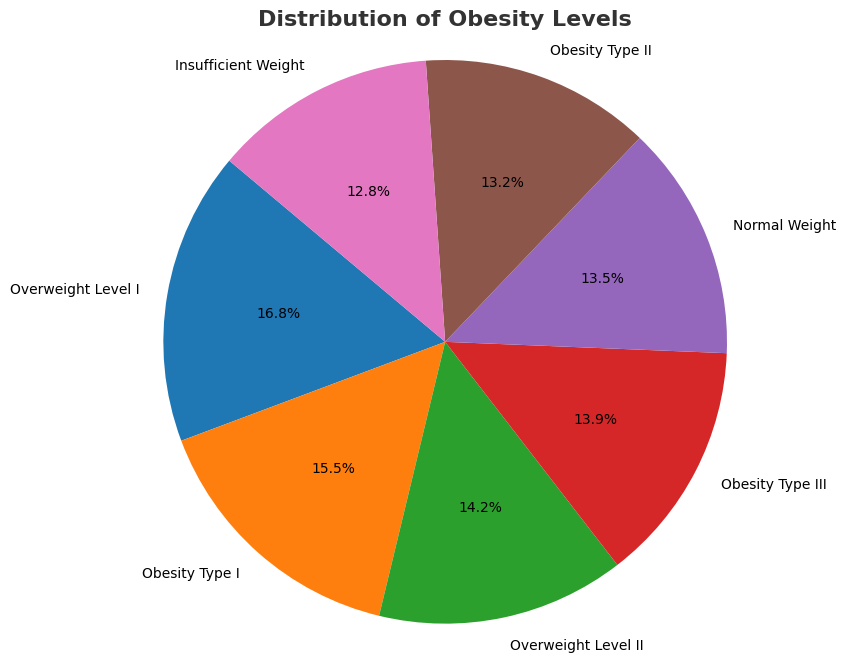

In [24]:
# Calculates counts for each obesity level
obesity_counts = df_preprocessed['obesity_level_encoded'].value_counts()

# Creates a DataFrame for plotting
obesity_df = pd.DataFrame({'Obesity Level': obesity_counts.index, 'Count': obesity_counts.values})

# Mapping of numeric values to corresponding labels
label_mapping = {
    0: 'Insufficient Weight',
    1: 'Normal Weight',
    2: 'Overweight Level I',
    3: 'Overweight Level II',
    4: 'Obesity Type I',
    5: 'Obesity Type II',
    6: 'Obesity Type III'
}

# Replaces numeric values with labels
obesity_df['Obesity Level'] = obesity_df['Obesity Level'].map(label_mapping)

# Gets a color map with distinct colors
colors = plt.cm.tab10(np.arange(len(obesity_df))) 

# Plots pie chart with distinct colors
plt.figure(figsize=(8, 8))
plt.pie(obesity_df['Count'], labels=obesity_df['Obesity Level'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Obesity Levels', fontsize=16, fontweight='bold', color='#333333')

# Displays the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.gca().set_facecolor('#f7f7f7')  # Set background color
plt.show()

The distribution of obesity levels appears to be evenly distributed among all categories, suggesting that the dataset may represent a balanced sample across different weight categories, with no single group being overwhelmingly predominant. This even distribution could indicate a diverse population in terms of health and lifestyle factors.

Additionally, this raises some interesting questions:
- Are there any demographic or lifestyle factors (e.g. gender, physical activity) that significantly correlate with certain obesity levels?
- What impact do family history, diet, or exercise habits have on the distribution of weight categories in this dataset?
- Could this balanced distribution reflect broader societal trends in weight management, or is it specific to the population from which the data was collected?

Further analysis could explore these questions by examining the relationships between obesity levels and other variables in the dataset, potentially identifying risk factors or protective behaviors associated with different weight categories. This could help inform targeted interventions or strategies for addressing obesity and related health conditions.

#### Modes of Transportation Distributions

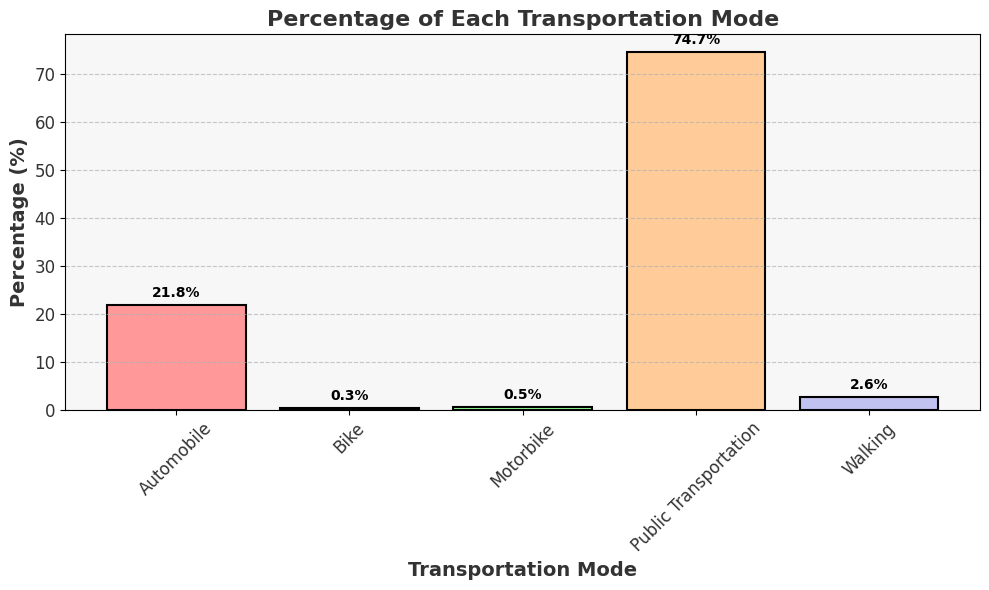

In [25]:
# Counts the number of True values for each transportation mode
transportation_counts = {
    'Automobile': df_preprocessed['transportation_mode_automobile'].sum(),
    'Bike': df_preprocessed['transportation_mode_bike'].sum(),
    'Motorbike': df_preprocessed['transportation_mode_motorbike'].sum(),
    'Public Transportation': df_preprocessed['transportation_mode_public_transportation'].sum(),
    'Walking': df_preprocessed['transportation_mode_walking'].sum()
}

# Converts counts to a DataFrame
transportation_df = pd.DataFrame(list(transportation_counts.items()), columns=['Transportation Mode', 'Count'])

# Calculates percentages
total_count = len(df_preprocessed)
transportation_df['Percentage'] = (transportation_df['Count'] / total_count) * 100

# Defines colors for each transportation mode
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Plots bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(transportation_df['Transportation Mode'], transportation_df['Percentage'], color=colors, edgecolor='black', linewidth=1.5)

# Sets title and labels
plt.title('Percentage of Each Transportation Mode', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Transportation Mode', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold', color='#333333')

# Customizes tick parameters
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Adds grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotates the bars with the percentage
for bar in bars:
    yval = bar.get_height()  # Gets the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')  # Adds text above the bar

# Adds a background color to the plot
plt.gca().set_facecolor('#f7f7f7')

# Adjusts layout to prevent clipping of tick-labels
plt.tight_layout()

# Shows plot
plt.show()

Analysis of Transportation Modes in Relation to the Obesity Dataset

1. Automobile (21.8%)
A significant portion of individuals using automobiles as their primary mode of transportation may face more sedentary lifestyles. Since driving typically involves prolonged sitting, this can contribute to a lack of daily physical activity, which is linked to higher BMI and obesity levels. In the context of the obesity dataset, individuals who rely on cars may show a higher prevalence of overweight or obesity compared to those who use more active forms of transportation.

2. Bike (0.3%) and Motorbike (0.5%)
The very low usage of biking suggests that few individuals in this dataset engage in cycling, which is a form of active transportation linked to better physical health and lower BMI. This could indicate a missed opportunity for increasing daily activity, especially given the benefits of cycling for weight management. The low motorbike usage likely has a limited impact on physical activity levels, as it’s more similar to driving in terms of being a passive mode of transportation.

3. Public Transportation (74.7%)
The majority of individuals using public transportation likely spend significant amounts of time sitting while commuting, which could contribute to sedentary behaviors. However, public transportation users often walk to and from bus or train stations, which introduces some light physical activity. In the obesity dataset, those relying on public transportation may have a mixed profile: they could experience less overall physical activity compared to walkers or cyclists, but more than those using automobiles.

4. Walking (2.6%)
Although a small percentage, individuals who walk as their primary mode of transportation are likely more physically active on a daily basis. This group may have a lower prevalence of obesity or overweight, as walking is a form of moderate-intensity physical activity that can help regulate body weight. In the dataset, these individuals might fall under the "normal weight" or "insufficient weight" categories more frequently than other transportation groups.

Potential Insights and Recommendations
- **Obesity and Sedentary Lifestyles**: The high reliance on **automobiles** and **public transportation** suggests that a large portion of the population may engage in sedentary activities during their commute, which could contribute to higher obesity rates. Encouraging more active forms of commuting, such as walking or biking, could potentially help in reducing the obesity levels within the population.
  
- **Active Transportation for Obesity Prevention**: The low percentage of individuals using **bikes** or **walking** highlights an opportunity to promote active transportation methods, which are associated with healthier weight profiles. Programs or policies could be introduced to encourage walking or cycling as part of daily routines, particularly for individuals classified as "overweight" or "obese" in the dataset.

- **Public Transit and Physical Activity**: While **public transportation** is the most used mode, efforts to increase walking distances to and from transit stations or encouraging standing during short rides could help mitigate some of the sedentary effects associated with this mode.

#### Alcohol Frequency Distributions

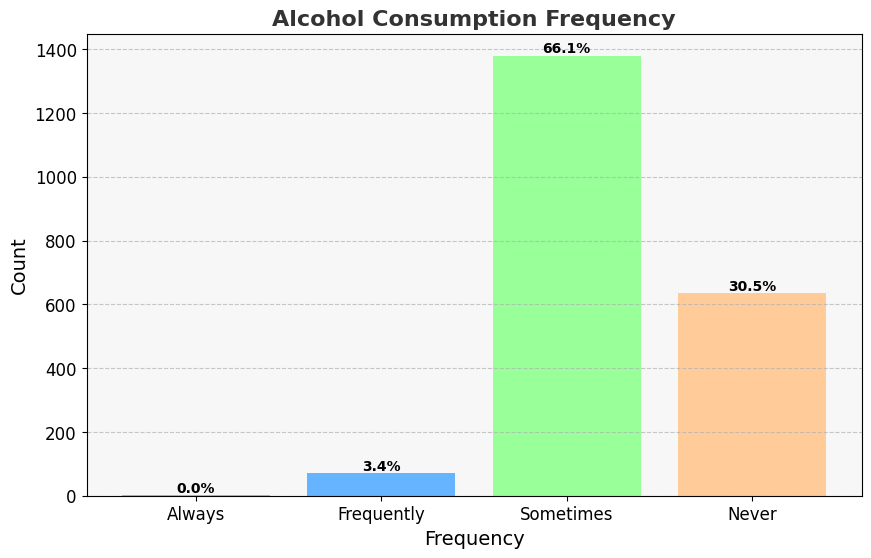

In [26]:
# Creates a dictionary to store the counts for each alcohol consumption frequency
alcohol_counts = {
    'Always': df_preprocessed['alcohol_consumption_frequency_always'].sum(),
    'Frequently': df_preprocessed['alcohol_consumption_frequency_frequently'].sum(),
    'Sometimes': df_preprocessed['alcohol_consumption_frequency_sometimes'].sum(),
    'Never': df_preprocessed['alcohol_consumption_frequency_no'].sum(),
}

# Converts counts to a DataFrame
alcohol_df = pd.DataFrame(list(alcohol_counts.items()), columns=['Alcohol Consumption Frequency', 'Count'])

# Plots bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(alcohol_df['Alcohol Consumption Frequency'], alcohol_df['Count'], color=colors)

# Adds data labels (percentages) on top of the bars
total_count = alcohol_df['Count'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_count) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customizes the plot
plt.title('Alcohol Consumption Frequency', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.gca().set_facecolor('#f7f7f7')  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Displays the plot
plt.show()

Analysis of Alcohol Consumption Frequency in Relation to Obesity Levels

1. Always (0%)
There are no individuals in the dataset who consume alcohol "always," which suggests that constant alcohol consumption may not be a common behavior. As chronic alcohol consumption is often linked to higher calorie intake and poorer dietary choices, this absence could indicate that extreme alcohol consumption is not a significant factor in the obesity levels within this population.

2. Frequently (3.4%)
A small percentage of individuals consume alcohol "frequently," which could contribute to higher caloric intake. Alcohol contains empty calories, and frequent consumption may be associated with weight gain over time. In the obesity dataset, these individuals may show a slightly higher prevalence of overweight or obesity compared to those who drink less frequently.

3. Sometimes (66.1%)
The majority of individuals consume alcohol "sometimes." Occasional alcohol consumption may not have a substantial direct impact on weight, but depending on the amount and type of alcohol consumed, it can still contribute to caloric surplus and weight gain. This group is likely to exhibit varying obesity levels, with some individuals maintaining normal weight while others may trend toward overweight, depending on their overall lifestyle.

4. Never (30.5%)
A significant portion of the population reports never consuming alcohol. This group may be less prone to obesity caused by alcohol-related calorie intake, but their weight outcomes will largely depend on other lifestyle factors such as diet and physical activity. These individuals might be more represented in the "normal weight" or "underweight" categories of the dataset.


Alcohol consumption frequency appears to play a modest role in obesity levels within this dataset. The majority of individuals drink alcohol occasionally, which suggests that alcohol may contribute to obesity in a more indirect way. The group that never consumes alcohol is relatively large and might have more favorable weight outcomes, though further analysis would be needed to confirm this. Encouraging moderation in alcohol consumption, along with other healthy behaviors, could help address weight management issues.

#### Food Between Meals Frequency Distribution

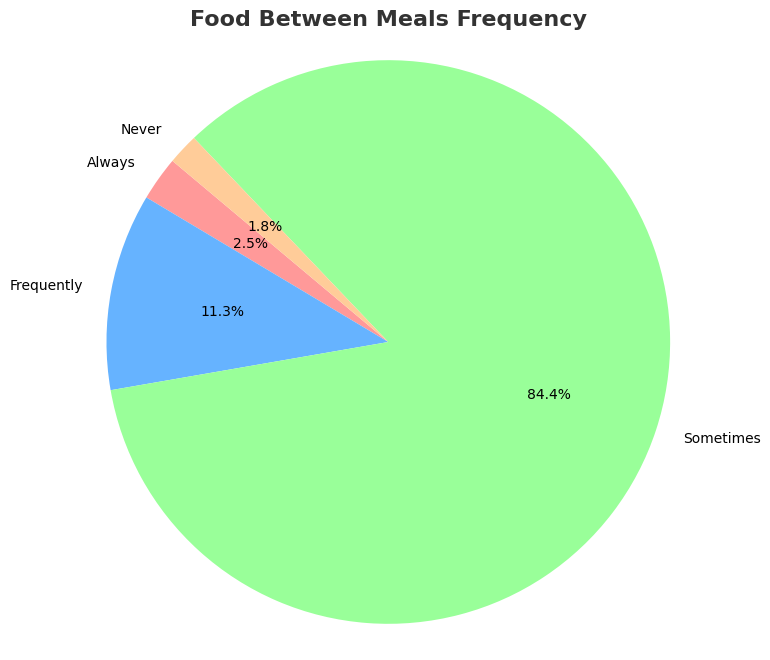

In [27]:
# Creates a dictionary to store the counts for each food between meals frequency
food_between_meals_counts = {
    'Always': df_preprocessed['food_between_meals_frequency_always'].sum(),
    'Frequently': df_preprocessed['food_between_meals_frequency_frequently'].sum(),
    'Sometimes': df_preprocessed['food_between_meals_frequency_sometimes'].sum(),
    'Never': df_preprocessed['food_between_meals_frequency_no'].sum(),
}

# Converts counts to a DataFrame
food_between_meals_df = pd.DataFrame(list(food_between_meals_counts.items()), columns=['Food Between Meals Frequency', 'Count'])

# Defines colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 

# Plots pie chart
plt.figure(figsize=(8, 8))
plt.pie(food_between_meals_df['Count'], labels=food_between_meals_df['Food Between Meals Frequency'], 
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Food Between Meals Frequency', fontsize=16, fontweight='bold', color='#333333')

# Displays the plot
plt.axis('equal') 
plt.gca().set_facecolor('#f7f7f7')
plt.show()

Food Between Meals Frequency in Relation to Obesity Levels

1. Sometimes (84.4%)
A significant majority of individuals in the dataset consume food between meals "sometimes." This behavior can potentially contribute to caloric overconsumption if the snacks are high in calories, which could explain the high prevalence of overweight or obesity in this group. However, "sometimes" could also reflect mindful snacking, so the obesity outcomes for this group may vary based on the quality of food consumed between meals.

2. Frequently (11.3%)
A smaller portion of individuals snack "frequently," which is more likely to contribute to weight gain if these snacks are not nutritionally balanced. Frequent eating between meals, especially of high-calorie foods, can lead to an increased caloric intake, which may contribute to higher levels of overweight or obesity. This group is expected to show a higher likelihood of being overweight or obese compared to the "sometimes" group.

3. Always (2.5%)
Only a small percentage of individuals report "always" eating food between meals. Constant snacking can significantly increase daily caloric intake, especially if the snacks are not healthy. This behavior is often associated with poor dietary habits and can directly lead to weight gain. In the obesity dataset, this group is likely to have a higher representation in the obesity categories, particularly those with more severe levels of obesity.

4. Never (1.8%)
A very small portion of individuals report "never" eating food between meals. This group may maintain better portion control and caloric balance, which could help in weight management. It is likely that these individuals are more represented in the "normal weight" or "underweight" categories, though other lifestyle factors, such as physical activity, will also influence their overall weight outcomes.

The frequency of eating between meals appears to have a strong correlation with obesity levels. The majority of the population snacks "sometimes," which can result in varied weight outcomes depending on the quality of snacks consumed. Those who snack "frequently" or "always" are at higher risk of obesity, while the small percentage who "never" snack may maintain healthier weight levels. To combat obesity, promoting healthier snack options and mindful eating could be key strategies.

#### Distributions for Binary Categorical Attributes

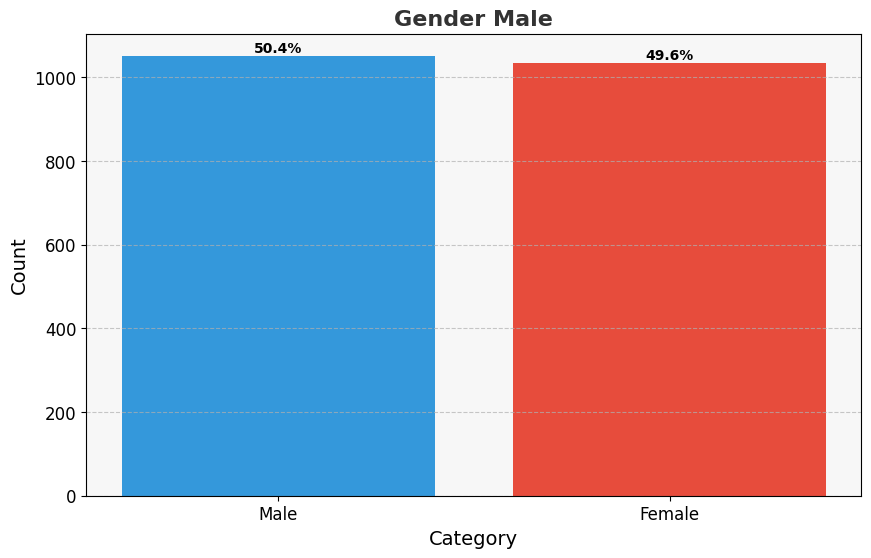

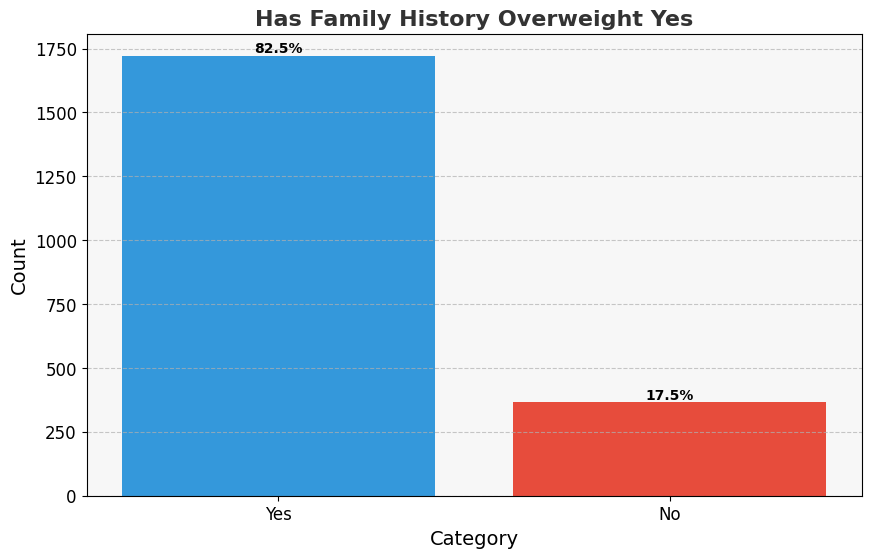

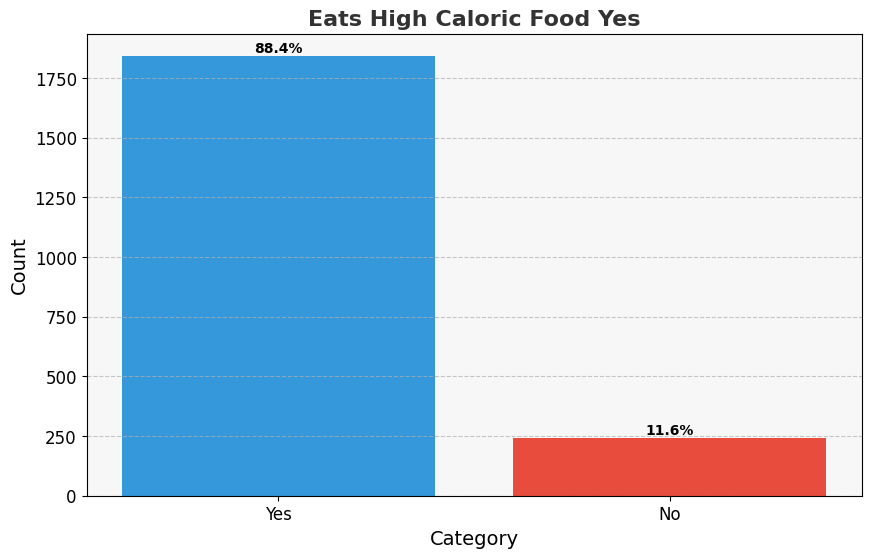

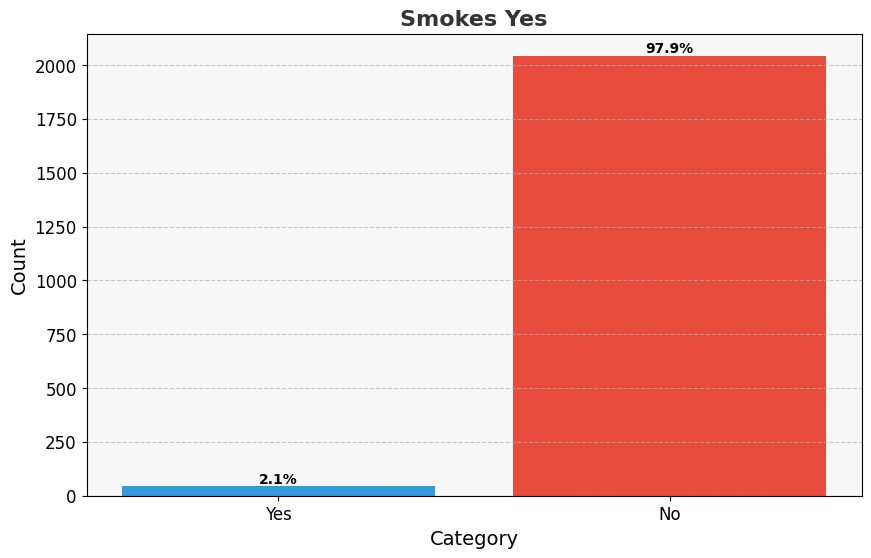

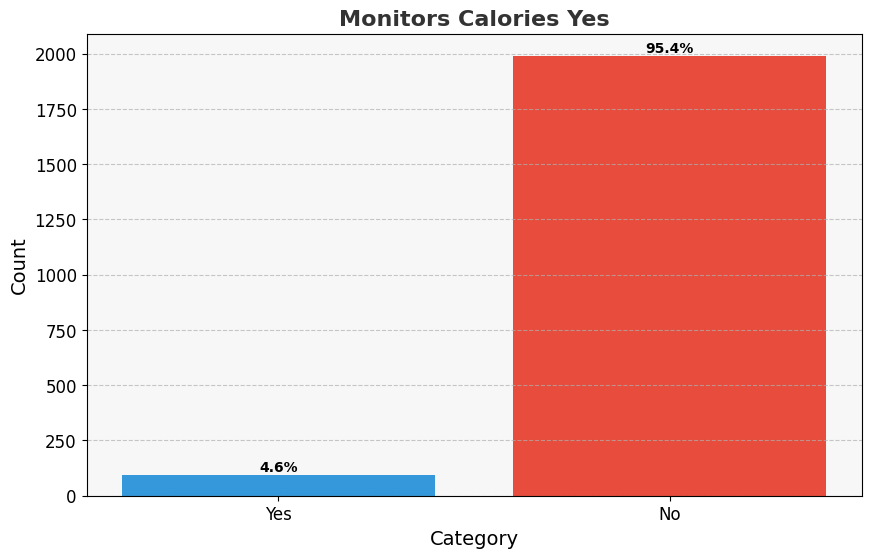

In [28]:
colors = ['#3498db', '#e74c3c']  # Blue and red for binary variables

# Lists of columns to plot
columns_to_plot = [
    'gender_male',
    'has_family_history_overweight_yes',
    'eats_high_caloric_food_yes',
    'smokes_yes',
    'monitors_calories_yes'
]

# Plottings each variable
for column in columns_to_plot:
    # Calculates counts
    count_male = df_preprocessed[column].sum()
    count_female = len(df_preprocessed) - count_male  # Total count - count_male for binary variables
    
    # Creates DataFrame for plotting
    if column == 'gender_male':
        count_data = pd.DataFrame({
            'Category': ['Male', 'Female'],
            'Count': [count_male, count_female]
        })
    else:
        count_data = pd.DataFrame({
            'Category': ['Yes', 'No'],
            'Count': [count_male, count_female]
        })
    
    # Plots bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(count_data['Category'], count_data['Count'], color=colors)
    
    # Adds data labels (percentages) on top of the bars
    total_count = count_data['Count'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_count) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Customizes the plot
    plt.title(f'{column.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.gca().set_facecolor('#f7f7f7') 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    
    # Displays the plot
    plt.show()

Remaining Categorical Attributes in Relation to Obesity Levels

1. Gender: Male (50.4%), Female (49.6%)
The gender distribution is nearly equal, which suggests that obesity levels should be relatively balanced across genders in the dataset. However, societal and biological factors can influence obesity outcomes differently for men and women. Men might have higher muscle mass but could also have higher obesity rates due to lifestyle factors such as physical activity, diet, or metabolic differences.

2. Family History of Overweight: Yes (82.5%), No (17.5%)
A significant majority of individuals have a family history of being overweight. This strong genetic predisposition is an important risk factor for obesity, as family history often correlates with shared genetic and environmental influences like diet and lifestyle. Those with a family history are more likely to be in higher obesity categories.

3. Eats High-Caloric Food: Yes (88.4%), No (11.6%)
An overwhelming majority report eating high-caloric food, which is a key driver of obesity. High caloric intake, particularly from processed and unhealthy foods, leads to weight gain when not offset by physical activity. This is a significant contributing factor to the high levels of overweight and obesity observed in the dataset.

4. Smokes: Yes (2.1%), No (97.9%)
A very small percentage of individuals smoke. While smoking is not directly linked to obesity, smokers often have different metabolic rates and appetites, which can influence weight. However, since such a small percentage of individuals smoke, the effect of smoking on obesity in this dataset is likely minimal.

5. Monitors Calories: Yes (4.6%), No (95.4%)
Only a small percentage of individuals actively monitor their caloric intake. Those who monitor calories are more likely to manage their weight effectively, potentially lowering their risk of being overweight or obese. The vast majority, however, do not monitor calories, which likely contributes to higher obesity levels due to lack of awareness of daily caloric consumption.

The categorical attributes reveal key insights into obesity risk factors, such as family history, diet, and lifestyle choices. The high prevalence of high-caloric food consumption and the low percentage of calorie monitoring suggest significant areas for intervention in reducing obesity levels.

In [29]:
df_preprocessed.head(6)

,obesity_level_encoded,daily_main_meals_count,daily_water_intake_l,physical_activity_frequency,daily_screen_time_hours,bmi,gender_male,has_family_history_overweight_yes,eats_high_caloric_food_yes,food_between_meals_frequency_always,...,monitors_calories_yes,alcohol_consumption_frequency_always,alcohol_consumption_frequency_frequently,alcohol_consumption_frequency_sometimes,alcohol_consumption_frequency_no,transportation_mode_automobile,transportation_mode_bike,transportation_mode_motorbike,transportation_mode_public_transportation,transportation_mode_walking
0,1,0.390906,-0.007810,-1.186977,0.554211,-0.670475,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,1,0.390906,1.636552,2.328908,-1.090505,-0.688960,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2,1,0.390906,-0.007810,1.156947,0.554211,-0.747890,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,5,0.390906,-0.007810,1.156947,-1.090505,-0.363194,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,6,-2.225418,-0.007810,-1.186977,-1.090505,-0.177412,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
5,1,0.390906,-0.007810,-1.186977,-1.090505,-1.192902,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False


## **1.3 Dividing Dataset into Training and Testing Splits**

- **[.5 points]** Divide your data into training and testing splits using an 80% training and 20% testing split. Use the cross validation modules that are part of scikit-learn. Argue "for" or "against" splitting your data using an 80/20 split. That is, why is the 80/20 split appropriate (or not) for your dataset?

### Training and Testing Splits (80% vs 20%)

In [30]:
# Dividing into training and testing splits (80% vs 20%)

# Features (X) - drops the target variable from the DataFrame
X = df_preprocessed.drop('obesity_level_encoded', axis=1)

# Target variable (y)
y = df_preprocessed['obesity_level_encoded']

# Splits the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displays the sizes
print(f'Training data size: {len(X_train)}')
print(f'Testing data size: {len(X_test)}')


Training data size: 1669
Testing data size: 418


### K-Fold Cross Validation 

In [31]:
# K-Fold Cross Validation

# Initializes KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier()

# Cross-validation with 5-folds
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Outputs cross-validation accuracy
print("Average Accuracy from Cross-Validation:", cv_scores.mean())


Average Accuracy from Cross-Validation: 0.95387063710417


### Analysis of Cross-Validation Results
- The Random Forest classifier was chosen due to its robustness, ability to handle complex datasets, and effectiveness in reducing overfitting through ensemble learning. The average accuracy from cross-validation is 0.9557, indicating that approximately 95.57% of predictions are correct.

- Using n_splits = 5 means the dataset was divided into five subsets, allowing the model to train on four subsets while validating on the remaining one. This method enhances the reliability of performance estimates and minimizes bias from a single train-test split. Overall, the high accuracy suggests that the Random Forest classifier is well-suited for the task at hand.

### Argument for Using an 80/20 Split for the Dataset

1. **Sufficient Training Data**: 
   - With 2087 total entries, allocating 80% (1669 samples) for training provides enough data for the model to learn complex patterns and relationships between features and the target label. This ensures the model has the opportunity to generalize well to unseen data, as a larger training set allows it to better capture the underlying structure of the dataset.

2. **Balanced Test Size**: 
   - Setting aside 20% (418 samples) for testing provides a substantial sample size to evaluate the model's performance in a real-world scenario. This larger test set helps in reducing the risk of random fluctuations in performance metrics like accuracy, precision, or recall, giving a more reliable estimate of the model’s generalization ability.

3. **Cross-Validation Support**: 
   - The 80/20 split works well with cross-validation techniques like k-fold cross-validation (e.g., k=5 or k=10). With a sufficiently large training set, cross-validation can be applied to further validate the model without compromising the test set. This ensures that we can optimize hyperparameters and improve model performance while keeping the test data purely for evaluation.

4. **Avoiding Overfitting**: 
   - Keeping a dedicated 20% test set allows us to monitor for overfitting, ensuring that the model is not just memorizing the training data. Comparing performance between the training and test sets helps to identify if the model is generalizing well to unseen data or if it needs further tuning to prevent overfitting.

In summary, the **80/20 split** is appropriate for the dataset because it offers a strong balance between providing sufficient training data for model learning and reserving enough test data to reliably evaluate performance. Additionally, it enables the use of cross-validation for model tuning and helps prevent overfitting. This makes the 80/20 split a reasonable and appropriate choice for our dataset. This approach provides a reliable framework for developing and validating predictive models.

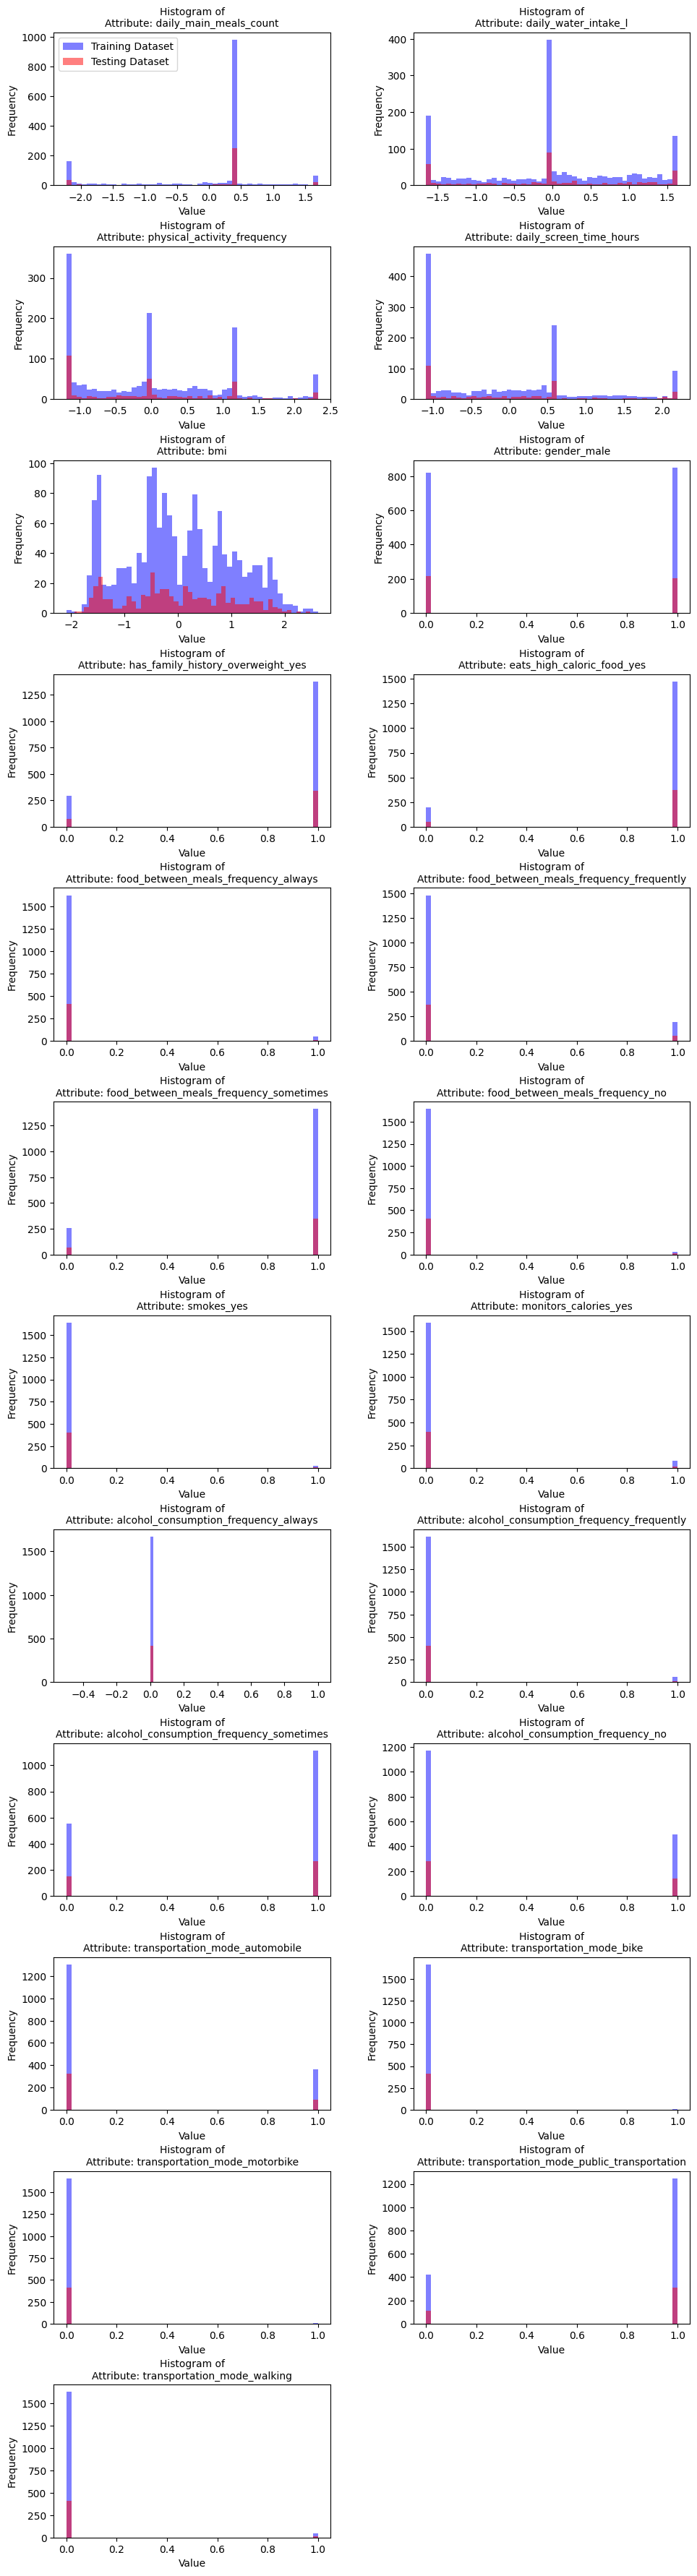

In [32]:
# Number of attributes (columns)
num_attributes = len(X_train.columns)

# Set the number of rows and columns for 2 plots per row
num_cols = 2
num_rows = (num_attributes + num_cols - 1) // num_cols  # Round up to the nearest integer

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Flatten axs for easy 1D indexing
axs = axs.flatten()

# Plot histograms for each attribute
for i, col in enumerate(X_train.columns):
    # Check if the column is of boolean type
    if X_train[col].dtype == 'bool':
        train_data = X_train[col].astype(int)
        test_data = X_test[col].astype(int)
    else:
        train_data = X_train[col]
        test_data = X_test[col]

    # Plot histogram for training dataset
    axs[i].hist(train_data, bins=50, color='blue', alpha=0.5)

    # Plot histogram for testing dataset
    axs[i].hist(test_data, bins=50, color='red', alpha=0.5)

    # Add labels and title (with reduced font size for titles)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of\nAttribute: {col}', fontsize=10)  # Adding line break to titles

# Hide any unused subplots (in case of extra subplots)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])  # Delete unused subplot

# Add legend outside the loop
axs[0].legend(['Training Dataset', 'Testing Dataset'])

# Adjust layout and add more spacing
plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Increase space between rows and columns

# Show plot
plt.show()

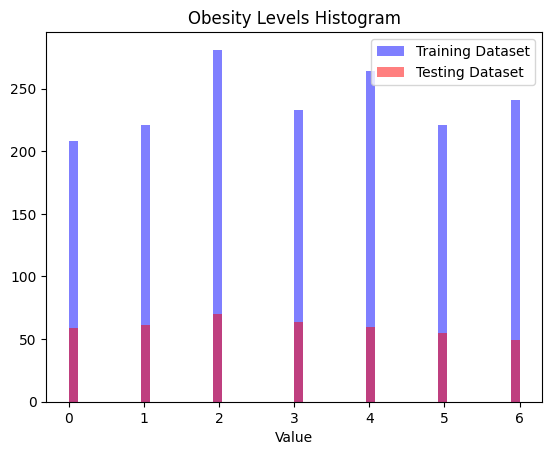

In [33]:
# distribution of training and testing datasets in target variable
plt.hist(y_train, bins=50, color='blue', alpha=0.5, label='Training Dataset')
plt.hist(y_test, bins=50, color='red', alpha=0.5, label='Testing Dataset')
plt.title('Obesity Levels Histogram')
plt.xlabel("Value")
plt.legend()
plt.show()